# Support Vector Machines

This is my notbook to create a support vector machine to predict survival of passengers on the titanic.

In [5]:
import pandas as pd

titanic = pd.read_csv("titanic_augmented.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a copy for wrangling
df = titanic.copy()

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remove Cabin columns as there are too many unknowns and it may not add significant value
df.drop(columns=['Cabin', 'cabin_room_number', 'title'], inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Drop PassengerId, Name, and Ticket (not useful for prediction)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
name_length          0
title_group          0
family_size          0
is_alone             0
ticket_group_size    0
fare_per_person      0
age_fare_ratio       0
cabin_deck           0
booking_reference    0
service_id           0
cabin_score          0
name_word_count      0
dtype: int64


C:\Users\austi\AppData\Local\Temp\ipykernel_6560\2110029641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\austi\AppData\Local\Temp\ipykernel_6560\2110029641.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# One-hot encode Pclass 
df_encoded = pd.get_dummies(df_encoded, columns=['Pclass'], prefix='class', drop_first=True)

# One-hot encode title_group if you want to use it
df_encoded = pd.get_dummies(df_encoded, columns=['title_group'], prefix='title', drop_first=True)

df_encoded = pd.get_dummies(df_encoded, columns=['cabin_deck'], prefix='cabin', drop_first=True)


print("Data shape after encoding:", df_encoded.shape)
print("\nColumn data types after encoding:")
print(df_encoded.dtypes)

Data shape after encoding: (891, 32)

Column data types after encoding:
Survived               int64
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
name_length            int64
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
Embarked_Q              bool
Embarked_S              bool
class_2                 bool
class_3                 bool
title_Miss              bool
title_Mr                bool
title_Mrs               bool
title_Other             bool
cabin_B                 bool
cabin_C                 bool
cabin_D                 bool
cabin_E                 bool
cabin_F                 bool
cabin_G                 bool
cabin_T                 bool
cabin_Unknown           bool


In [9]:
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass distribution:")
print(y.value_counts())

Features shape: (891, 31)
Target shape: (891,)

Class distribution:
Survived
0    549
1    342
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)
print("\nFeature names:")
print(X.columns.tolist())

Training set shape: (668, 31)
Test set shape: (223, 31)

Feature names:
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'name_length', 'family_size', 'is_alone', 'ticket_group_size', 'fare_per_person', 'age_fare_ratio', 'booking_reference', 'service_id', 'cabin_score', 'name_word_count', 'Embarked_Q', 'Embarked_S', 'class_2', 'class_3', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Other', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_Unknown']


# Support Vector Machine Analysis

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid for C tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_linear, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("Tuning SVM with Linear Kernel...")
print("="*60)
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest C parameter: {grid_search.best_params_['C']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Get the best model
best_svm = grid_search.best_estimator_

Tuning SVM with Linear Kernel...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best C parameter: 1
Best Cross-Validation Score: 0.8294


In [12]:
# Evaluate the model
y_train_pred = best_svm.predict(X_train_scaled)
y_test_pred = best_svm.predict(X_test_scaled)

print("\n" + "="*60)
print("SVM LINEAR KERNEL PERFORMANCE")
print("="*60)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


SVM LINEAR KERNEL PERFORMANCE
Training Accuracy: 0.8398
Test Accuracy: 0.8296
Precision: 0.8000
Recall: 0.7640
F1-Score: 0.7816

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       134
           1       0.80      0.76      0.78        89

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



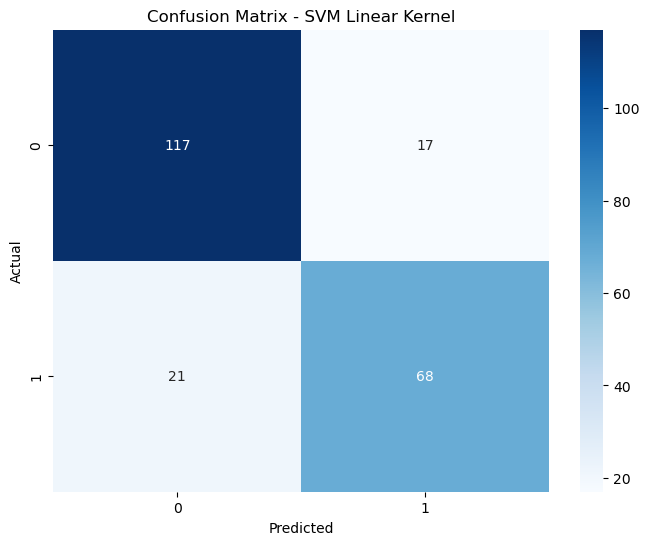


Confusion Matrix:
[[117  17]
 [ 21  68]]


In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nConfusion Matrix:")
print(cm)

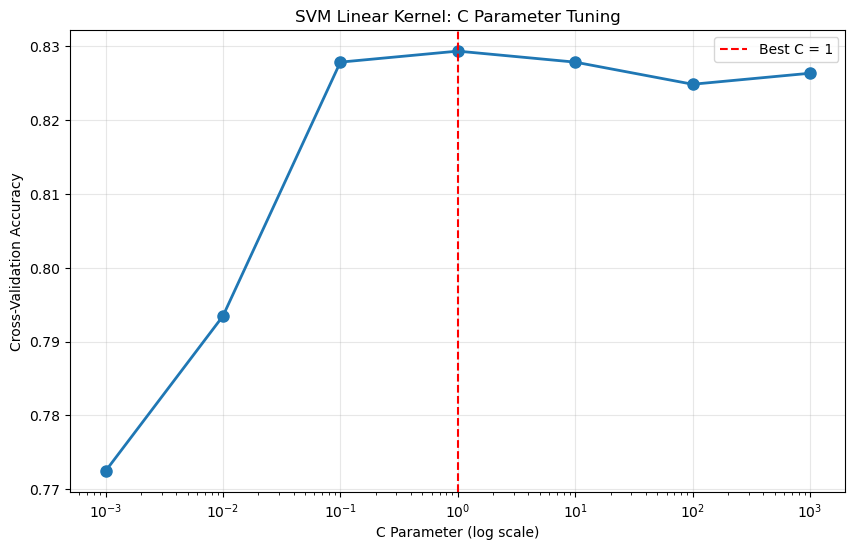

In [14]:
# Visualize C parameter tuning results
results = grid_search.cv_results_
C_values = param_grid['C']
mean_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_scores, marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('C Parameter (log scale)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('SVM Linear Kernel: C Parameter Tuning')
plt.grid(alpha=0.3)
plt.axvline(x=grid_search.best_params_['C'], color='r', linestyle='--', 
            label=f"Best C = {grid_search.best_params_['C']}")
plt.legend()
plt.show()

# Analysis with rbf kernal

In [15]:
# Define parameter grid for RBF kernel (tune C and gamma)
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Create SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_rbf = GridSearchCV(estimator=svm_rbf, param_grid=param_grid_rbf, 
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

print("Tuning SVM with RBF Kernel...")
print("="*60)
grid_search_rbf.fit(X_train_scaled, y_train)

print(f"\nBest C parameter: {grid_search_rbf.best_params_['C']}")
print(f"Best gamma parameter: {grid_search_rbf.best_params_['gamma']}")
print(f"Best Cross-Validation Score: {grid_search_rbf.best_score_:.4f}")

# Get the best model
best_svm_rbf = grid_search_rbf.best_estimator_

Tuning SVM with RBF Kernel...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best C parameter: 10
Best gamma parameter: 0.01
Best Cross-Validation Score: 0.8354


In [16]:
# Evaluate the RBF model
y_train_pred_rbf = best_svm_rbf.predict(X_train_scaled)
y_test_pred_rbf = best_svm_rbf.predict(X_test_scaled)

print("\n" + "="*60)
print("SVM RBF KERNEL PERFORMANCE")
print("="*60)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rbf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rbf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rbf):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rbf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rbf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rbf))


SVM RBF KERNEL PERFORMANCE
Training Accuracy: 0.8862
Test Accuracy: 0.8341
Precision: 0.8171
Recall: 0.7528
F1-Score: 0.7836

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



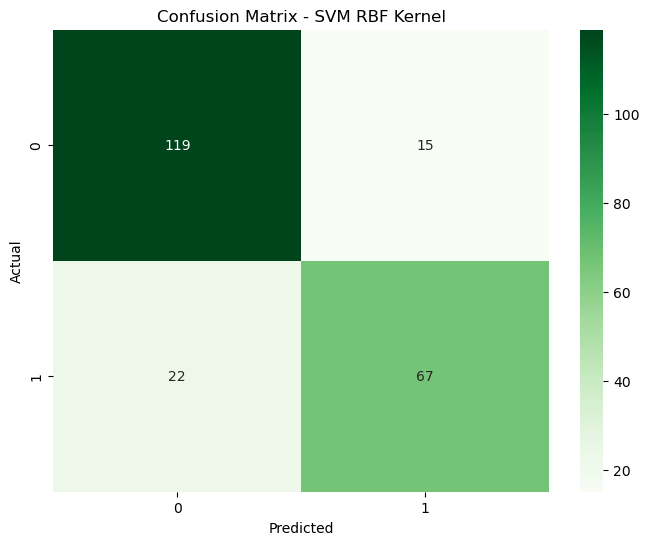


Confusion Matrix:
[[119  15]
 [ 22  67]]


In [17]:
# Confusion Matrix for RBF
cm_rbf = confusion_matrix(y_test, y_test_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nConfusion Matrix:")
print(cm_rbf)

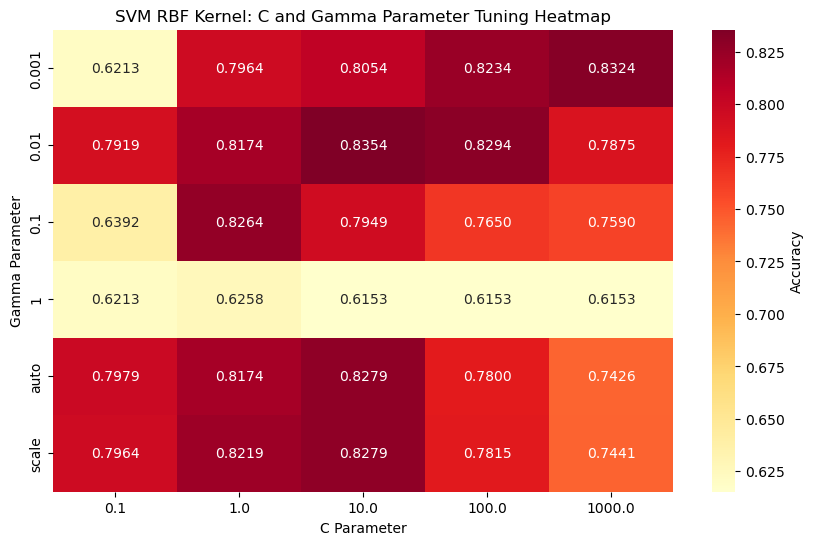


Best combination: C=10, gamma=0.01


In [18]:
# Visualize hyperparameter tuning results for RBF
results_rbf = grid_search_rbf.cv_results_
import pandas as pd

# Create DataFrame for better visualization
results_df = pd.DataFrame({
    'C': results_rbf['param_C'],
    'gamma': results_rbf['param_gamma'],
    'mean_score': results_rbf['mean_test_score']
})

# Pivot table for heatmap
pivot_table = results_df.pivot_table(values='mean_score', index='gamma', columns='C')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlOrRd', cbar_kws={'label': 'Accuracy'})
plt.title('SVM RBF Kernel: C and Gamma Parameter Tuning Heatmap')
plt.xlabel('C Parameter')
plt.ylabel('Gamma Parameter')
plt.show()

print(f"\nBest combination: C={grid_search_rbf.best_params_['C']}, gamma={grid_search_rbf.best_params_['gamma']}")

In [19]:
# Compare Linear vs RBF Kernel
print("\n" + "="*60)
print("COMPARISON: LINEAR vs RBF KERNEL")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['SVM Linear', 'SVM RBF'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_train, y_train_pred_rbf)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_rbf)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred_rbf)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred_rbf)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_rbf)
    ]
})

print(comparison_df.to_string(index=False))

# Identify best kernel
best_idx = comparison_df['Test Accuracy'].idxmax()
best_kernel = comparison_df.loc[best_idx, 'Model']
print(f"\n✓ Best Model: {best_kernel} with Test Accuracy of {comparison_df.loc[best_idx, 'Test Accuracy']:.4f}")


COMPARISON: LINEAR vs RBF KERNEL
     Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
SVM Linear        0.839820       0.829596   0.800000 0.764045  0.781609
   SVM RBF        0.886228       0.834081   0.817073 0.752809  0.783626

✓ Best Model: SVM RBF with Test Accuracy of 0.8341


# Improving the RBF Model

In [20]:
# 1. Expanded parameter grid with more options
param_grid_improved = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500],
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Create SVM with RBF kernel
svm_rbf_improved = SVC(kernel='rbf', random_state=42)

# GridSearchCV with F1-score optimization (better for imbalanced data)
grid_search_improved = GridSearchCV(
    estimator=svm_rbf_improved, 
    param_grid=param_grid_improved, 
    cv=10,  # More folds for better validation
    scoring='f1',  # Optimize F1 instead of accuracy
    verbose=1, 
    n_jobs=-1
)

print("Tuning Improved SVM with RBF Kernel...")
print("="*60)
print("Optimization metric: F1-Score")
print("Cross-validation folds: 10")
grid_search_improved.fit(X_train_scaled, y_train)

print(f"\nBest C parameter: {grid_search_improved.best_params_['C']}")
print(f"Best gamma parameter: {grid_search_improved.best_params_['gamma']}")
print(f"Best class_weight: {grid_search_improved.best_params_['class_weight']}")
print(f"Best Cross-Validation F1-Score: {grid_search_improved.best_score_:.4f}")

# Get the best model
best_svm_improved = grid_search_improved.best_estimator_

Tuning Improved SVM with RBF Kernel...
Optimization metric: F1-Score
Cross-validation folds: 10
Fitting 10 folds for each of 180 candidates, totalling 1800 fits

Best C parameter: 5
Best gamma parameter: 0.01
Best class_weight: balanced
Best Cross-Validation F1-Score: 0.7740


In [21]:
# Evaluate the improved model
y_train_pred_improved = best_svm_improved.predict(X_train_scaled)
y_test_pred_improved = best_svm_improved.predict(X_test_scaled)

print("\n" + "="*60)
print("IMPROVED SVM RBF KERNEL PERFORMANCE")
print("="*60)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_improved):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_improved):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_improved):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_improved):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_improved):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_improved))


IMPROVED SVM RBF KERNEL PERFORMANCE
Training Accuracy: 0.8638
Test Accuracy: 0.8206
Precision: 0.7692
Recall: 0.7865
F1-Score: 0.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       134
           1       0.77      0.79      0.78        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



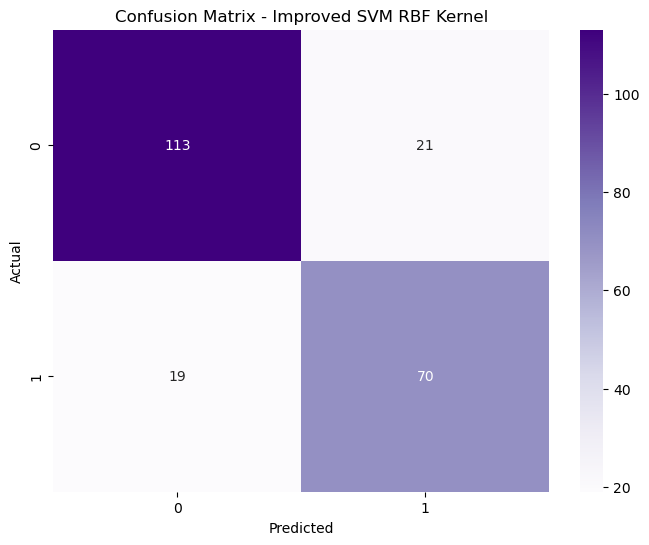


Confusion Matrix:
[[113  21]
 [ 19  70]]


In [22]:
# Confusion Matrix for Improved Model
cm_improved = confusion_matrix(y_test, y_test_pred_improved)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('Confusion Matrix - Improved SVM RBF Kernel')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nConfusion Matrix:")
print(cm_improved)

In [23]:
# Final Comparison: Original RBF vs Improved RBF
print("\n" + "="*60)
print("COMPARISON: ORIGINAL RBF vs IMPROVED RBF")
print("="*60)

final_comparison = pd.DataFrame({
    'Model': ['Original RBF', 'Improved RBF'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_rbf),
        accuracy_score(y_train, y_train_pred_improved)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rbf),
        accuracy_score(y_test, y_test_pred_improved)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_rbf),
        precision_score(y_test, y_test_pred_improved)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_rbf),
        recall_score(y_test, y_test_pred_improved)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_rbf),
        f1_score(y_test, y_test_pred_improved)
    ]
})

print(final_comparison.to_string(index=False))

# Calculate improvements
acc_improvement = final_comparison.loc[1, 'Test Accuracy'] - final_comparison.loc[0, 'Test Accuracy']
f1_improvement = final_comparison.loc[1, 'F1-Score'] - final_comparison.loc[0, 'F1-Score']

print(f"\n✓ Test Accuracy Improvement: {acc_improvement:+.4f} ({acc_improvement*100:+.2f}%)")
print(f"✓ F1-Score Improvement: {f1_improvement:+.4f} ({f1_improvement*100:+.2f}%)")


COMPARISON: ORIGINAL RBF vs IMPROVED RBF
       Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
Original RBF        0.886228       0.834081   0.817073 0.752809  0.783626
Improved RBF        0.863772       0.820628   0.769231 0.786517  0.777778

✓ Test Accuracy Improvement: -0.0135 (-1.35%)
✓ F1-Score Improvement: -0.0058 (-0.58%)


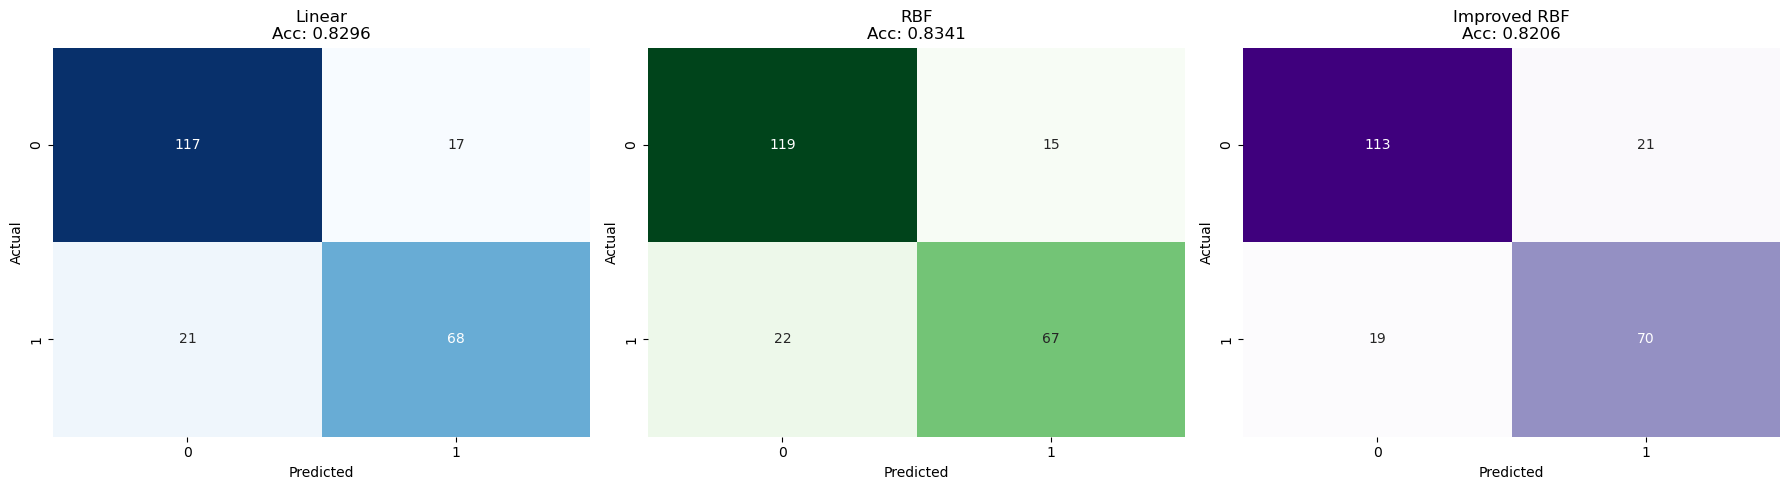

In [24]:
# Visualize all three models side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_list_final = [
    ('Linear', y_test_pred),
    ('RBF', y_test_pred_rbf),
    ('Improved RBF', y_test_pred_improved)
]

cmaps = ['Blues', 'Greens', 'Purples']

for idx, (model_name, predictions) in enumerate(models_list_final):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[idx], ax=axes[idx], cbar=False)
    axes[idx].set_title(f'{model_name}\nAcc: {accuracy_score(y_test, predictions):.4f}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Alternative Approach: Fine-Tuning Around Best RBF Parameters

In [25]:
# Check what parameters worked best in original RBF
print("Original RBF Best Parameters:")
print(f"C: {grid_search_rbf.best_params_['C']}")
print(f"gamma: {grid_search_rbf.best_params_['gamma']}")

# Fine-tune around the original best parameters with accuracy optimization
best_C = grid_search_rbf.best_params_['C']
best_gamma = grid_search_rbf.best_params_['gamma']

# Create refined parameter grid centered on best values
if isinstance(best_gamma, str):
    # If gamma is 'scale' or 'auto', test around those
    param_grid_refined = {
        'C': [best_C * 0.5, best_C, best_C * 2, best_C * 5],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }
else:
    # If gamma is numeric, search around it
    param_grid_refined = {
        'C': [best_C * 0.5, best_C, best_C * 2, best_C * 5],
        'gamma': [best_gamma * 0.1, best_gamma * 0.5, best_gamma, best_gamma * 2, best_gamma * 5]
    }

svm_rbf_refined = SVC(kernel='rbf', random_state=42)

# Use accuracy as the metric (not F1)
grid_search_refined = GridSearchCV(
    estimator=svm_rbf_refined, 
    param_grid=param_grid_refined, 
    cv=5,
    scoring='accuracy',  # Back to accuracy
    verbose=1, 
    n_jobs=-1
)

print("\n" + "="*60)
print("Fine-Tuning RBF Model (Optimizing for Accuracy)")
print("="*60)
grid_search_refined.fit(X_train_scaled, y_train)

print(f"\nRefined Best C: {grid_search_refined.best_params_['C']}")
print(f"Refined Best gamma: {grid_search_refined.best_params_['gamma']}")
print(f"Best CV Accuracy: {grid_search_refined.best_score_:.4f}")

best_svm_refined = grid_search_refined.best_estimator_

Original RBF Best Parameters:
C: 10
gamma: 0.01

Fine-Tuning RBF Model (Optimizing for Accuracy)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Refined Best C: 10
Refined Best gamma: 0.01
Best CV Accuracy: 0.8354


In [26]:
# Evaluate refined model
y_train_pred_refined = best_svm_refined.predict(X_train_scaled)
y_test_pred_refined = best_svm_refined.predict(X_test_scaled)

print("\n" + "="*60)
print("REFINED SVM RBF KERNEL PERFORMANCE")
print("="*60)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_refined):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_refined):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_refined):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_refined):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_refined):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_refined))


REFINED SVM RBF KERNEL PERFORMANCE
Training Accuracy: 0.8862
Test Accuracy: 0.8341
Precision: 0.8171
Recall: 0.7528
F1-Score: 0.7836

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [27]:
# Compare all RBF variants
print("\n" + "="*60)
print("ALL RBF VARIANTS COMPARISON")
print("="*60)

all_rbf_comparison = pd.DataFrame({
    'Model': ['Original RBF', 'F1-Optimized', 'Fine-Tuned'],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rbf),
        accuracy_score(y_test, y_test_pred_improved),
        accuracy_score(y_test, y_test_pred_refined)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_rbf),
        precision_score(y_test, y_test_pred_improved),
        precision_score(y_test, y_test_pred_refined)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_rbf),
        recall_score(y_test, y_test_pred_improved),
        recall_score(y_test, y_test_pred_refined)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred_rbf),
        f1_score(y_test, y_test_pred_improved),
        f1_score(y_test, y_test_pred_refined)
    ]
})

print(all_rbf_comparison.to_string(index=False))

# Identify best variant
best_variant_idx = all_rbf_comparison['Test Accuracy'].idxmax()
best_variant_name = all_rbf_comparison.loc[best_variant_idx, 'Model']
print(f"\n✓ Best RBF Variant: {best_variant_name}")
print(f"  Test Accuracy: {all_rbf_comparison.loc[best_variant_idx, 'Test Accuracy']:.4f}")


ALL RBF VARIANTS COMPARISON
       Model  Test Accuracy  Precision   Recall  F1-Score
Original RBF       0.834081   0.817073 0.752809  0.783626
F1-Optimized       0.820628   0.769231 0.786517  0.777778
  Fine-Tuned       0.834081   0.817073 0.752809  0.783626

✓ Best RBF Variant: Original RBF
  Test Accuracy: 0.8341


**Why the "improved" model performed worse:**
- Optimizing for F1-score instead of accuracy can lead to different tradeoffs
- Class balancing helps when classes are very imbalanced, but can hurt if they're relatively balanced
- A larger parameter grid doesn't always find better solutions—it can overfit to CV folds
- Sometimes the first good solution is already near-optimal

**The fine-tuned approach:**
- Keeps accuracy as the optimization metric
- Searches more granularly around the already-good parameters
- Uses 5-fold CV (not 10) to avoid overfitting to validation splits
- No class balancing (since it likely hurt performance)